<a href="https://colab.research.google.com/github/Ravitejaa249/DIP-project/blob/main/DWT_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
!pip install PyWavelets
import pywt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration
IMAGE_SIZE = (256, 256)
TARGET_SIZE = (128, 128)  # DWT output size
BATCH_SIZE = 32
EPOCHS = 20

def apply_dwt(image):
    """Apply DWT and return stacked subbands"""
    # Convert to grayscale
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply 2D DWT
    coeffs = pywt.dwt2(image, 'haar')
    LL, (LH, HL, HH) = coeffs

    # Normalize each subband to [0, 1]
    normalized = []
    for band in [LL, LH, HL, HH]:
        band = band.astype(np.float32)
        band -= np.min(band)
        band /= (np.max(band) + 1e-8)
        normalized.append(band)

    # Stack into 4-channel image
    return np.stack(normalized, axis=-1)

def load_and_preprocess_images(directory, label, max_samples=1000):
    images = []
    labels = []
    for filename in os.listdir(directory)[:max_samples]:
        img = cv2.imread(os.path.join(directory, filename))
        img = cv2.resize(img, IMAGE_SIZE)
        dwt_img = apply_dwt(img)
        images.append(dwt_img)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load dataset
print("Loading and preprocessing images...")
real_dir = '/content/drive/MyDrive/AI-face-detection-Dataset/real'
fake_dir = '/content/drive/MyDrive/AI-face-detection-Dataset/AI'

X_real, y_real = load_and_preprocess_images(real_dir, 0)
X_fake, y_fake = load_and_preprocess_images(fake_dir, 1)

# Combine and shuffle
X = np.concatenate([X_real, X_fake])
y = np.concatenate([y_real, y_fake])
indices = np.random.permutation(len(X))
X, y = X[indices], y[indices]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 4)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Train model
print("Training model...")
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // BATCH_SIZE
)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Save model
model.save('deepfake_detection_dwt_cnn.h5')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.0 MB/s eta 0:00:00
Loading and preprocessing images...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 243ms/step - accuracy: 0.7691 - loss: 0.4639 - val_accuracy: 0.9175 - val_loss: 0.2451
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.8857 - loss: 0.2905 - val_accuracy: 0.9075 - val_loss: 0.2545
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.9055 - loss: 0.2544 - val_accuracy: 0.9375 - val_loss: 0.1976
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.9056 - loss: 0.2472 - val_accuracy: 0.9125 - val_loss: 0.2210
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.9155 - loss: 0.2225 - val_accuracy: 0.9250 - val_loss: 0.2342
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.8875 - loss: 0.2858 - val_accuracy: 0.9425 - val_loss: 0.1869
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.9199 - loss: 0.1978 - val_accuracy: 0.9375 - val_loss: 0.2051
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.9354 - loss: 0.1974 - val_accuracy:

Test Accuracy: 0.9625


In [ ]:
import os
import cv2
import numpy as np
import pywt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def apply_dwt(image):
    if image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    LL, (LH, HL, HH) = pywt.dwt2(image, 'haar')
    bands = []
    for band in (LL, LH, HL, HH):
        band = band.astype('float32')
        band -= band.min()
        band /= (band.max() + 1e-8)
        bands.append(band)
    return np.stack(bands, axis=-1)

def predict_deepfake(
    image_path,
    model_path='deepfake_detection_dwt_cnn.h5',
    threshold=0.5
):
    # 1. Verify file exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Cannot find image at: {image_path}")

    # 2. Load image (try OpenCV, fallback to PIL)
    img = cv2.imread(image_path)
    if img is None:
        pil = load_img(image_path, color_mode='rgb', target_size=(256,256))
        img = img_to_array(pil).astype('uint8')

    # 3. Preprocess: resize & DWT
    img = cv2.resize(img, (256, 256))
    dwt_img = apply_dwt(img)
    input_tensor = np.expand_dims(dwt_img, axis=0)  # shape (1,256,256,4)

    # 4. Load model & predict
    model = tf.keras.models.load_model(model_path)
    prob = float(model.predict(input_tensor)[0][0])
    is_fake = prob > threshold

    # 5. New confidence logic
    if prob < 0.1 or prob > 0.9:
        confidence_level = 'High'
    else:
        confidence_level = 'Low'

    return {
        'probability': round(prob, 4),
        'classification': 'Fake' if is_fake else 'Real',
        'confidence': abs(prob - threshold),
        'confidence_level': confidence_level
    }

# Example usage:
result = predict_deepfake(
    '/content/WIN_20250328_14_02_30_Pro.jpg',
    model_path='deepfake_detection_dwt_cnn.h5',
    threshold=0.3
)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
{'probability': 0.0003, 'classification': 'Real', 'confidence': 0.2996730796410702, 'confidence_level': 'High'}


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Accuracy: 0.9625 | Precision: 0.9250 | Recall: 1.0000 | F1-Score: 0.9610 | AUC: 0.9984


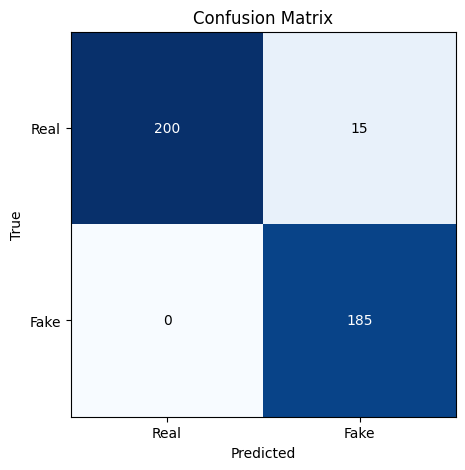

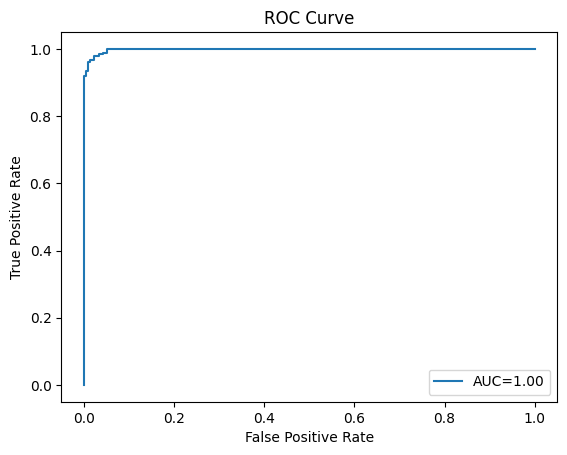

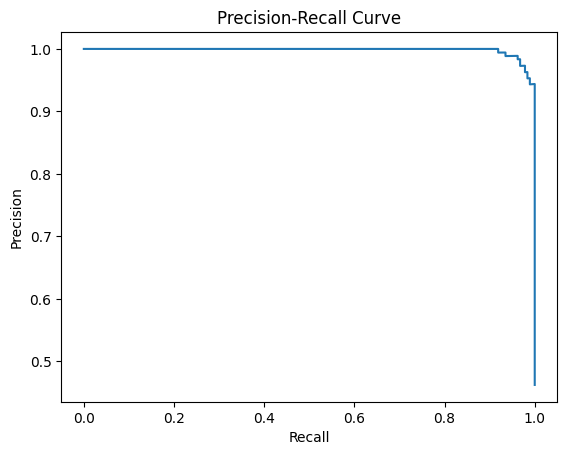

In [ ]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions on the held-out test set
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

# 5.1 Metrics Used
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f} | AUC: {auc:.4f}")

# 5.2 Confusion Matrix Analysis
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, val, ha='center', va='center',
             color='white' if val > cm.max()/2 else 'black')
plt.xticks([0,1], ['Real','Fake'])
plt.yticks([0,1], ['Real','Fake'])
plt.show()

# 5.3 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

# 5.4 Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(recall_vals, precision_vals)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


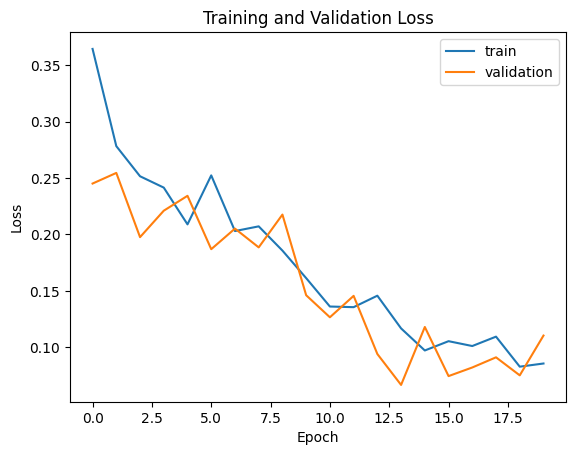

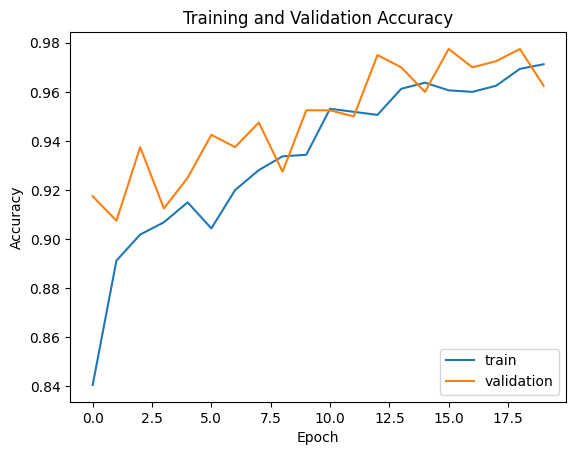

In [ ]:
import matplotlib.pyplot as plt

# 6.1 Training vs. Validation Loss Plot
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# 6.1 Training vs. Validation Accuracy Plot
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# If you also ran fine-tuning (history_fine), you can plot its curves similarly:
# plt.figure()
# plt.plot(history_fine.history['loss'])
# plt.plot(history_fine.history['val_loss'])
# plt.title('Fine-tuning Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['train', 'validation'], loc='upper right')
# plt.show()

# plt.figure()
# plt.plot(history_fine.history['accuracy'])
# plt.plot(history_fine.history['val_accuracy'])
# plt.title('Fine-tuning Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['train', 'validation'], loc='lower right')
# plt.show()
